In [4]:
from google.colab import auth
import gspread
from google.auth import default
import pandas as pd



In [5]:

auth.authenticate_user()
creds, _ = default()
gc = gspread.authorize(creds)



In [6]:
worksheet = gc.open('ML').sheet1



In [7]:
rows = worksheet.get_all_values()



In [8]:
df = pd.DataFrame(rows[1:], columns=rows[0])
df = df.astype({'input':'float'})
df = df.astype({'output':'float'})
df.head()


,input,output
0,1.0,11.0
1,2.0,22.0
2,3.0,33.0
3,4.0,44.0
4,5.0,55.0


In [9]:

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import MinMaxScaler

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


In [10]:

X = df[['input']].values
y = df[['output']].values

X


array([[ 1.],
       [ 2.],
       [ 3.],
       [ 4.],
       [ 5.],
       [ 6.],
       [ 7.],
       [ 8.],
       [ 9.],
       [10.],
       [11.],
       [12.],
       [13.],
       [14.],
       [15.],
       [16.],
       [17.],
       [18.],
       [19.]])

In [11]:

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.33,random_state = 33)


In [12]:

Scaler = MinMaxScaler()
Scaler.fit(X_train)
X_train1 = Scaler.transform(X_train)


In [13]:
ai_brain = Sequential([
    Dense(7,activation='relu'),
    Dense(7,activation='relu'),
    Dense(1)
])


In [14]:

ai_brain.compile(optimizer = 'rmsprop' , loss = 'mse')


Epoch 1/1000
1/1 [==============================] - 1s 852ms/step - loss: 14465.2236
Epoch 2/1000
1/1 [==============================] - 0s 12ms/step - loss: 14458.1396
Epoch 3/1000
1/1 [==============================] - 0s 11ms/step - loss: 14453.0439
Epoch 4/1000
1/1 [==============================] - 0s 8ms/step - loss: 14448.8213
Epoch 5/1000
1/1 [==============================] - 0s 11ms/step - loss: 14445.0967
Epoch 6/1000
1/1 [==============================] - 0s 9ms/step - loss: 14441.7188
Epoch 7/1000
1/1 [==============================] - 0s 9ms/step - loss: 14438.5967
Epoch 8/1000
1/1 [==============================] - 0s 10ms/step - loss: 14435.6670
Epoch 9/1000
1/1 [==============================] - 0s 10ms/step - loss: 14432.8643
Epoch 10/1000
1/1 [==============================] - 0s 10ms/step - loss: 14430.1670
Epoch 11/1000
1/1 [==============================] - 0s 9ms/step - loss: 14427.5752
Epoch 12/1000
1/1 [==============================] - 0s 10ms/step - loss: 144

<Axes: >

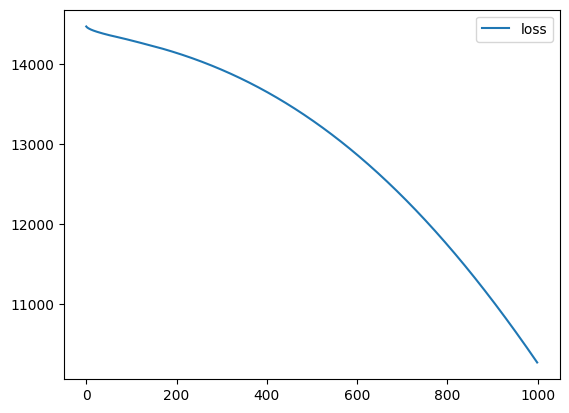

In [15]:

ai_brain.fit(X_train1 , y_train,epochs = 1000)
loss_df = pd.DataFrame(ai_brain.history.history)
loss_df.plot()

In [16]:


X_test1 = Scaler.transform(X_test)
ai_brain.evaluate(X_test1,y_test)



1/1 [==============================] - 0s 145ms/step - loss: 12929.8613


12929.861328125

In [18]:
X_n1 = [[100]]
X_n1_1 = Scaler.transform(X_n1)



In [19]:
ai_brain.predict(X_n1_1)

1/1 [==============================] - 0s 33ms/step


array([[100.844376]], dtype=float32)